# Historical Changes 1965-2005

In this notebook, the objective is to produce an account of what has changed from 1965 to 2005, which is included in the model, so that we can do a counterfactual. The output is a series of graphs showing changes in key parameters of the model. We divide in 4 groups the parameters that have changed. 

* Prices
* Income and Resources (includes taxes, SS, consumption floor)
* Health insurance
* Health Spending 
* Longevity
* Age Distribution (asked by a referee)

In [3]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
path = '/users/michaud/cedia/Projets/rise-data'
path2 = '/users/michaud/rise/params'

# Prices

## CPI

We get the CPI from FRED (https://fred.stlouisfed.org/series/CPIAUCSL#0)

In [4]:
cpi = pd.read_excel(path+'/raw/other/CPIAUCSL.xls',skiprows=10)

In [5]:
cpi['year'] = cpi['observation_date'].dt.year
cpi['value'] = cpi['CPIAUCSL']
cpi = cpi[['year','value']]
cpi = cpi.set_index('year')

In [6]:
cpi['inf'] = cpi['value'].pct_change()
cpi['inf5'] = cpi['inf'].rolling(window=5).mean()

The adjustment factor for turning 1965 expenditures in 2005

In [7]:
cpi.loc[2005,'value']/cpi.loc[1965,'value']

6.193371041919967

Text(0,0.5,'inflation rate')

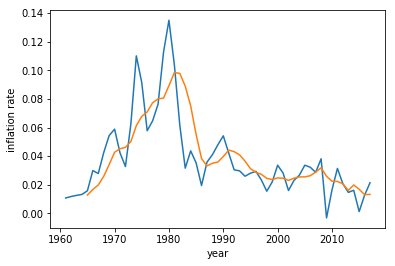

In [8]:
plt.figure()
plt.plot(cpi.index,cpi['inf'],label='one-year')
plt.plot(cpi.index,cpi['inf5'],label='5 yr MA')
plt.xlabel('year')
plt.ylabel('inflation rate')

In [9]:
cpi['inf'].describe()

count    57.000000
mean      0.038159
std       0.028138
min      -0.003204
25%       0.020732
50%       0.030416
75%       0.043682
max       0.135017
Name: inf, dtype: float64

## Medical CPI

We take the Medical CPI from FRED: https://fred.stlouisfed.org/series/CPIMEDSL#0

In [10]:
p = pd.read_excel(path+'/raw/other/CPIMEDSL.xls',skiprows=10)
p['year'] = p['observation_date'].dt.year
p['value'] = p['CPIMEDSL']
p = p[['year','value']]
p = p.set_index('year')

In [11]:
p['inf'] = p['value'].pct_change()
p['inf5'] = p['inf'].rolling(window=5).mean()


Text(0,0.5,'medical care inflation rate')

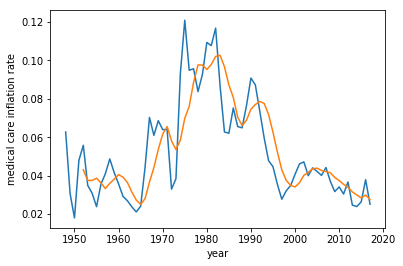

In [12]:
plt.figure()
plt.plot(p.index,p['inf'],label='one-year')
plt.plot(p.index,p['inf5'],label='5 yr MA')
plt.xlabel('year')
plt.ylabel('medical care inflation rate')

Excess medical price inflation has been on average 1.4%

In [13]:
excess = p['inf'].mean() - cpi['inf'].mean()
p['inf'].mean(),cpi['inf'].mean(),excess

(0.052454389152763244, 0.038158953376701964, 0.01429543577606128)

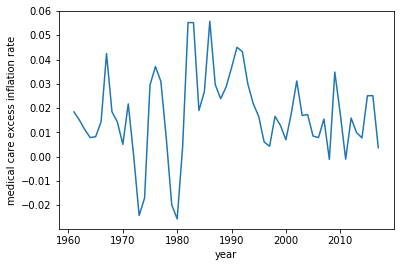

In [14]:
p['excess'] = p['inf'] - cpi['inf']
plt.figure()
plt.plot(p.index,p['excess'],label='one-year')
plt.xlabel('year')
plt.ylabel('medical care excess inflation rate')
plt.savefig('../../excess.png')

Reconstruct a series for adjusted excess price index

In [15]:
p['prel'] = np.nan
p.loc[2005,'prel'] = 1.0
for y in range(2004,1964,-1):
    p.loc[y,'prel'] = p.loc[y+1,'prel']/(1.0+ p.loc[y,'excess'])
tab = p.loc[(p.index>=1965)&(p.index<=2005),'prel']
tab

year
1965    0.471633
1966    0.475535
1967    0.482405
1968    0.502906
1969    0.512228
1970    0.519536
1971    0.522202
1972    0.533577
1973    0.533711
1974    0.520802
1975    0.511942
1976    0.527071
1977    0.546668
1978    0.563602
1979    0.567834
1980    0.556581
1981    0.542336
1982    0.544492
1983    0.574597
1984    0.606333
1985    0.617897
1986    0.634461
1987    0.669872
1988    0.689815
1989    0.706310
1990    0.726605
1991    0.753236
1992    0.787216
1993    0.821270
1994    0.845890
1995    0.864360
1996    0.878716
1997    0.884068
1998    0.887899
1999    0.902676
2000    0.914319
2001    0.920728
2002    0.937226
2003    0.966481
2004    0.982929
2005    1.000000
Name: prel, dtype: float64

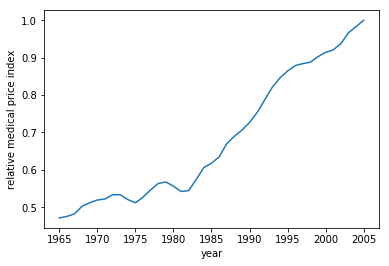

In [16]:
plt.figure()
plt.plot(tab.index,tab)
plt.xlabel('year')
plt.ylabel('relative medical price index')
plt.show()

We have not been asked to include this. But we wanted to have those numbers ready...

# Income and Resources

## Income Growth

We use real gdp per capita data from FRED (https://fred.stlouisfed.org/series/A939RX0Q048SBEA#0). Previously we had used GNP. It lead to some confusion. Probably better use GDP> 

In [17]:
gdp = pd.read_excel(path+'/raw/other/A939RX0Q048SBEA.xls',skiprows=10)

In [18]:
gdp.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
observation_date    71 non-null datetime64[ns]
A939RX0Q048SBEA     71 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


Since 2012 dollars, need adjust numbers to 2005

In [19]:
gdp['A939RX0Q048SBEA'] = gdp['A939RX0Q048SBEA']*cpi.loc[2005,'value']/cpi.loc[2012,'value']

In [20]:
gdp['year'] = gdp['observation_date'].dt.year
gdp = gdp[(gdp['year']>=1965) & (gdp['year']<=2005)]


In [21]:
gdp['gr'] = gdp['A939RX0Q048SBEA'].pct_change()
gdp['gr5'] = gdp['gr'].rolling(window=5).mean()

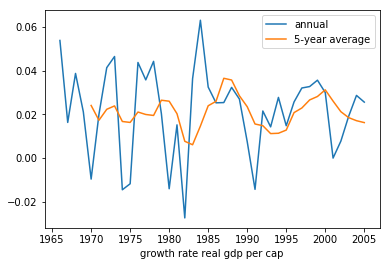

In [22]:
plt.plot(gdp['year'],gdp['gr'],label='annual')
plt.plot(gdp['year'],gdp['gr5'],label='5-year average')
plt.xlabel('year')
plt.xlabel('growth rate real gdp per cap')
plt.legend()

In [23]:
gdp['gr'].describe()

count    40.000000
mean      0.021760
std       0.020107
min      -0.027371
25%       0.014659
50%       0.025491
75%       0.033446
max       0.063050
Name: gr, dtype: float64

To get to 1965 levels

In [24]:
gdp = gdp.set_index('year')
fac = gdp.loc[1965,'A939RX0Q048SBEA']/gdp.loc[2005,'A939RX0Q048SBEA']
print('ratio of 1965 to 2005 real gdp per cap is ',fac)
1.0/fac

ratio of 1965 to 2005 real gdp per cap is  0.42593649360122665


2.3477678363390653

## T-Bills

In [25]:
tb = pd.read_excel(path+'/raw/other/TB3MS.xls',skiprows=10)

In [26]:
tb['year'] = tb['observation_date'].dt.year
tb = tb[(tb['year']>=1965) & (tb['year']<=2005)]
tb = tb.set_index('year')
tb['TB3MS'] = tb['TB3MS']/100.0
tb.head()

,observation_date,TB3MS
year,,
1965,1965-01-01,0.039492
1966,1966-01-01,0.048625
1967,1967-01-01,0.043067
1968,1968-01-01,0.053383
1969,1969-01-01,0.066667


In [27]:
tb['TB3MS'].describe()

count    41.000000
mean      0.058812
std       0.026850
min       0.010108
25%       0.043067
50%       0.053750
75%       0.071883
max       0.140250
Name: TB3MS, dtype: float64

In [28]:
tb['TB3MS'] = tb['TB3MS'] - cpi.loc[1965:2005,'inf']

In [29]:
tb['TB3MS'].describe()

count    41.000000
mean      0.012559
std       0.021078
min      -0.033666
25%       0.000068
50%       0.012295
75%       0.025675
max       0.054513
Name: TB3MS, dtype: float64

## Taxes


Following Gouveia and Strauss (1994), we use the functional form for the average tax rate: 
    
$$    atr(y) = \alpha_0(1-(\alpha_2 y^{\alpha_1} + 1)^{-1/\alpha_1} $$
    
We use parameters from 1965 to 1989 from GS 1994 and supplement with data from Guner et al. (RED) for 2000. We first impute the 2000 function for 1990-2005. The income is nominal with these functions. For 1965 to 1989, in 1989 dollars. For 2000 in 2000 dollars. 


In [30]:
import codecs
gs = pd.read_csv(path+'/raw/other/gouveia.dat', delimiter=r"\s+",header=None)
yr = [y for y in range(1965,1965+107)]
gs['year'] = yr
#gs = gs[(gs['year']>=1965) & (gs['year']<=2005)]
gs.columns = ['alpha0','alpha1','alpha2','year']
gs = gs[['year','alpha0','alpha1','alpha2']]
gs

,year,alpha0,alpha1,alpha2
0,1965,0.426,0.619,0.046
1,1966,0.426,0.619,0.046
2,1967,0.446,0.591,0.044
3,1968,0.430,0.609,0.055
4,1969,0.450,0.633,0.055
5,1970,0.294,0.850,0.069
6,1971,0.263,0.980,0.060
7,1972,0.250,1.057,0.055
8,1973,0.271,0.957,0.055
9,1974,0.349,0.773,0.047


Since income is nominal but we want to use real as input, will adjust equation:
$$    atr(y) = \alpha_0(1-(\alpha_2 (py)^{\alpha_1} + 1)^{-1/\alpha_1} $$
where $p$ is a price deflator to transform to nominal which yields:
$$    atr(y) = \alpha_0(1-(\alpha^{*}_2 y^{\alpha_1} + 1)^{-1/\alpha_1} $$
where $\alpha_2^{*} = \alpha_2 p^{\alpha_1}$. The following function does this:

In [31]:
def adjust(row):
    y = row['year']
    if y<=1989:
        row['alpha2'] = row['alpha2']*((cpi.loc[y,'value']/cpi.loc[2005,'value'])**row['alpha1'])
    else :
        row['alpha2'] = row['alpha2']*((cpi.loc[2012,'value']/cpi.loc[2005,'value'])**row['alpha1'])
    return row

In [32]:
gs = gs.apply(adjust,axis=1)
gsfull = gs
gs = gs[(gs['year']>=1965) & (gs['year']<=2005)]
gs

,year,alpha0,alpha1,alpha2
0,1965.0,0.426,0.619,0.014878
1,1966.0,0.426,0.619,0.015152
2,1967.0,0.446,0.591,0.015489
3,1968.0,0.430,0.609,0.019237
4,1969.0,0.450,0.633,0.019086
5,1970.0,0.294,0.850,0.017487
6,1971.0,0.263,0.980,0.012837
7,1972.0,0.250,1.057,0.010786
8,1973.0,0.271,0.957,0.013336
9,1974.0,0.349,0.773,0.016223


These are the parameters

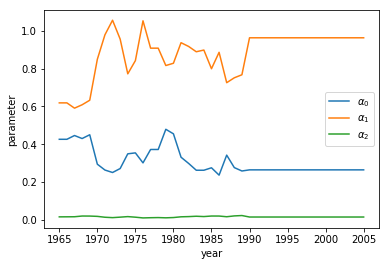

In [33]:
plt.figure()
plt.plot(gs['year'],gs['alpha0'],label='$\\alpha_0$')
plt.plot(gs['year'],gs['alpha1'],label='$\\alpha_1$')
plt.plot(gs['year'],gs['alpha2'],label='$\\alpha_2$')
plt.xlabel('year')
plt.ylabel('parameter')
plt.legend()

This is the GS function:

In [34]:
def gsfunc(row,inc):
    inck = inc*0.001
    atr = row['alpha0'] - row['alpha0']*(row['alpha2']*(inck**(row['alpha1'])) + 1.0 )**(-1.0/row['alpha1'])
    return inc*atr


Using income in real terms (2005), this function computes rates

/Users/michaud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/michaud/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


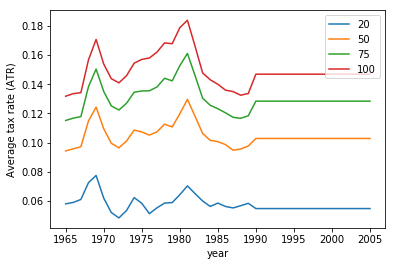

In [35]:
incs = [20.0e3,50.0e3,75.0e3,100.0e3]
plt.figure()
for i in incs:
    gs['tax'] = gs.apply(gsfunc,axis=1,inc=i)
    gs['atr'] = gs['tax']/i
    plt.plot(gs['year'],gs['atr'],label=str(int(i/1.0e3)))
plt.xlabel('year')
plt.ylabel('Average tax rate (ATR)')
plt.legend(loc=1)
plt.savefig('../figures/fedtaxes.png')

Reproducing the GS figure comparing function across years we get:

In [36]:
years = [1965,1975,1985,1995,2000]

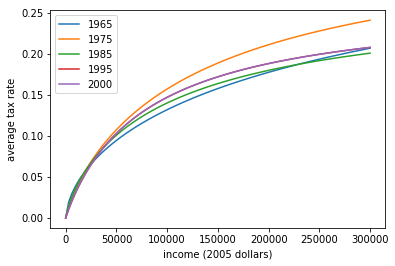

In [37]:
def gsf(pars,inc,yr):
    inck = inc*0.001
    atr = pars[0] - pars[0]*(pars[2]*(inck**(pars[1])) + 1.0 )**(-1.0/pars[1])
    return inc*atr
incs = np.linspace(1.0,300.0e3,100)
plt.figure()
for y in years:
    pars = gs.loc[gs['year']==y,['alpha0','alpha1','alpha2']].values.flatten()
    atrs = [] 
    for i in incs:
        atrs.append(gsf(pars,i,y)/i)
    plt.plot(incs,atrs,label=str(y))
plt.xlabel('income (2005 dollars)')
plt.ylabel('average tax rate')
plt.legend()

The bottom line here is that we did not adjust for inflation before. Now we do. Also we can see that the 2000 and 1965 functions are not that different...

In [38]:
gsfull[['alpha0','alpha1','alpha2']].to_csv('../params/input/gouveia.csv',sep=',',header=False,index=False)

## Social Security and Medicare Taxes


We use sstx data from https://www.ssa.gov/oact/progdata/taxRates.html
   download from https://www.google.ca/search?q=pay-fica-rate-history.xlsx&oq=pay-fica-rate-history.xlsx&aqs=chrome..69i57.12792j0j4&sourceid=chrome&ie=UTF-8  . This refers to the employer portion of SS and Medicare taxes. 

In [39]:
sstx = pd.read_excel(path+'/raw/other/pay-fica-rate-history_mod.xlsx')

In [40]:
sstx = sstx.set_index('year')
sstx = sstx.sort_index()
sstx['ssrate'] = sstx['ssrate']*.01
sstx['mctax'] = sstx['mctax']*.01
sstx

,ssmax,ssrate,mcmax,mctax
year,,,,
1965,6600,0.0385,6600,0.0000
1966,6600,0.0390,6600,0.0035
1967,7800,0.0380,7800,0.0050
1968,7800,0.0420,7800,0.0060
1969,7800,0.0420,7800,0.0060
1970,7800,0.0460,7800,0.0060
1971,9000,0.0460,9000,0.0060
1972,10800,0.0485,10800,0.0060
1973,13200,0.0495,13200,0.0100


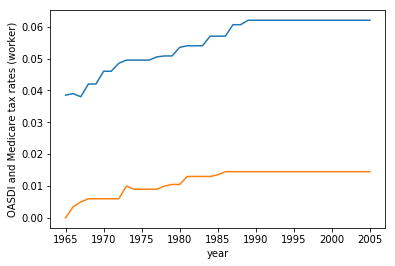

In [41]:
plt.figure()
plt.plot(sstx.index,sstx['ssrate'],label='Social Security')
plt.plot(sstx.index,sstx['mctax'],label='Medicare')
plt.xlabel('year')
#plt.ylim([3.5,8.0])
plt.ylabel('OASDI and Medicare tax rates (worker)')
plt.savefig('../figures/payroll.png')
plt.show()


Adjust maximum amounts for inflation (real dollars)

In [42]:
for y in range(1965,2006):
    sstx.loc[y,'ssmax'] =  sstx.loc[y,'ssmax']*(cpi.loc[2005,'value']/cpi.loc[y,'value'])
    if y<1993:
        sstx.loc[y,'mcmax'] =  sstx.loc[y,'mcmax']*(cpi.loc[2005,'value']/cpi.loc[y,'value'])
sstx

,ssmax,ssrate,mcmax,mctax
year,,,,
1965,40876.248877,0.0385,40876.248877,0.0000
1966,39689.772873,0.0390,39689.772873,0.0035
1967,45635.355805,0.0380,45635.355805,0.0050
1968,43777.149701,0.0420,43777.149701,0.0060
1969,41519.672876,0.0420,41519.672876,0.0060
1970,39212.529500,0.0460,39212.529500,0.0060
1971,43410.456978,0.0460,43410.456978,0.0060
1972,50441.618497,0.0485,50441.618497,0.0060
1973,58019.583568,0.0495,58019.583568,0.0100


Add years 

In [43]:
toadd = pd.DataFrame(data=None,index=[x for x in range(2006,2061)],columns=sstx.columns)
sstx = sstx.append(toadd)
sstx = sstx.sort_index()
g = (sstx.loc[2005,'ssmax']/sstx.loc[1995,'ssmax'])**(1.0/10.0)-1.0
for x in range(2006,2061):
    sstx.loc[x,:] =  sstx.loc[x-1,:]
    sstx.loc[x,'ssmax'] *= (1.0+g)
sstx.loc[2005:,:]

,ssmax,ssrate,mcmax,mctax
2005,94200.000000,0.062,1000000.0,0.0145
2006,95710.629945,0.062,1000000.0,0.0145
2007,97245.484974,0.062,1000000.0,0.0145
2008,98804.953569,0.062,1000000.0,0.0145
2009,100389.430443,0.062,1000000.0,0.0145
2010,101999.316641,0.062,1000000.0,0.0145
2011,103635.019636,0.062,1000000.0,0.0145
2012,105296.953437,0.062,1000000.0,0.0145
2013,106985.538691,0.062,1000000.0,0.0145
2014,108701.202794,0.062,1000000.0,0.0145


In [44]:
sstx[['ssrate','ssmax']].to_csv('../params/input/sstax.csv',sep=',',header=False,index=False)
sstx[['mctax','mcmax']].to_csv('../params/input/mctax.csv',sep=',',header=False,index=False)


## Consumption Floor

The Government Transfers, we use the Welfare Benefit Database
http://www.econ2.jhu.edu/people/moffitt/datasets.html constructed by Robert Moffitt
* selection of variable, the real modified benefit is in 1996 dollars
* same var as in Scholz et al. (2006)
* computing cmin time series from Moffitt (2002)
* http://www.econ2.jhu.edu/people/moffitt/ben_doc.pdf

In [45]:
names = ['state','year','maxafdc','foodstamp','medexp','consdef','medcpi','maxafdc_real',
         'foodstamp_real','mexpexp_real','bensum','bensum_real','afdc_rolls','afdc_receipts',
        'afdc_fam','afdc_rec','afdc_numfam','afdc_numrec','afdc_famben','afdc_recben',
         'afdcup','needy','pop','incpercap','urate','weekearn']
floor = pd.read_excel(path+'/raw/other/ben_data_moffitt.xlsx',header=None)
floor.columns = names

Deal with missings

In [46]:
for x in floor.columns:
    floor[x] = np.where(floor[x]==-1.0,np.nan,floor[x])

In [47]:
df = floor[['year','state','bensum_real','pop']].dropna()
df  = df[df['year']>=1965]
np.average(df['bensum_real'],weights=df['pop'])

949.9380711521225

Varation across states, most follow trend, large change in 1970 (AFDC)

Text(0,0.5,'real benefit')

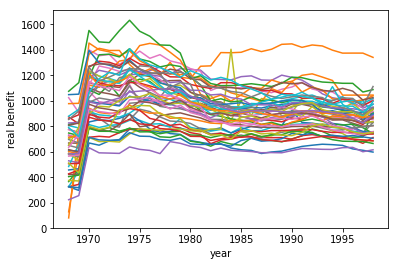

In [48]:
plt.figure()
for x in range(1,51,1):
    d = df[(df['state']==x) & (df['year']<2005)]
    plt.plot(d['year'],d['bensum_real'],label=x)
plt.xlabel('year')
plt.ylabel('real benefit')

Population weighed mean

In [49]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [50]:
cmin = df.groupby('year').apply(wavg, 'bensum_real','pop')
cmin = cmin.to_frame()
cmin.columns = ['value']


Transform to real using CPI (Moffitt has it in 1996 dollars)

In [51]:
adj = cpi.loc[2005,'value']/cpi.loc[1996,'value']
cmin['value'] = cmin['value']*adj*12.0
cmin1998 = cmin.loc[1998,'value']
cmin1968 = cmin.loc[1968,'value']


Fill in missing years

In [52]:
years  = [p for p in range(1999,2006)]
data = [cmin1998 for p in range(1999,2006)]

In [53]:
toadd = pd.DataFrame(data=data,index=years,columns=['value'])
cmin = cmin.append(toadd)

In [54]:
years  = [p for p in range(1965,1968)]
data = [cmin1968 for p in range(1965,1968)]

In [55]:
toadd = pd.DataFrame(data=data,index=years,columns=['value'])
cmin = cmin.append(toadd)
cmin = cmin.sort_index()
cmin

,value
1965.0,10198.330667
1966.0,10198.330667
1967.0,10198.330667
1968.0,10198.330667
1969.0,10465.787642
1970.0,16166.701391
1971.0,16047.467675
1972.0,16009.776946
1973.0,16036.811316
1974.0,16831.885409


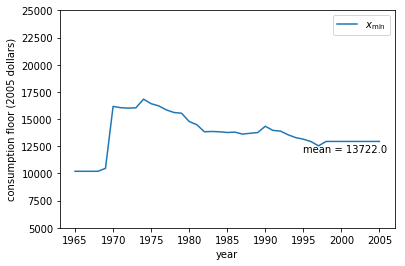

In [56]:
mcmin = np.round(cmin['value'].mean(),0)
plt.figure()
plt.plot(cmin.index,cmin['value'],label='$x_{\min}$')
plt.ylim([5000.0,25000.0])
plt.text(1995, 12000.0, 'mean = '+str(mcmin))
plt.xlabel('year')
plt.ylabel('consumption floor (2005 dollars)')
plt.savefig('../figures/xmin.png')
plt.legend()

In [57]:
cmin.loc[1968,'value']

10198.330666514381

In [58]:
add = pd.DataFrame(data=None,index=[x for x in range(2006,2061)],columns=['value'])
cmin = cmin.append(add)
for y in range(2006,2061):
    cmin.loc[y,'value'] = cmin.loc[y-1,'value']
cmin = cmin.sort_index()

In [59]:
cmin

,value
1965.0,10198.330667
1966.0,10198.330667
1967.0,10198.330667
1968.0,10198.330667
1969.0,10465.787642
1970.0,16166.701391
1971.0,16047.467675
1972.0,16009.776946
1973.0,16036.811316
1974.0,16831.885409


In [60]:
cmin['value'].to_csv('../params/input/cmin.csv',sep=',',header=False,index=False)

## Social Security PIA (generosity)

1983 amendment regulated with the cohort born 1940 would get once reaching retirement. Under the old PIA formula, benefit would follow... Check out https://www.ssa.gov/oact/NOTES/ran9/an2014-9.pdf. We use the hypothetical replacement rates for those earnings medium earnings at NRA. 

In [61]:
rates = [0.289,0.323,0.409,0.494,0.415,0.435,0.432,0.388,0.44]
yrs = [1965,1970,1975,1980,1985,1990,1995,2000,2005]
rep = pd.DataFrame(data={'year':yrs,'rate':rates})
rep = rep[['year','rate']]
rep

,year,rate
0,1965,0.289
1,1970,0.323
2,1975,0.409
3,1980,0.494
4,1985,0.415
5,1990,0.435
6,1995,0.432
7,2000,0.388
8,2005,0.440


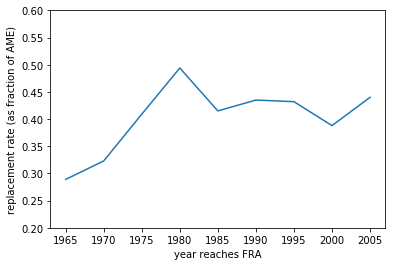

In [62]:
plt.figure()
plt.plot(rep['year'],rep['rate'])
plt.xlabel('year reaches FRA')
plt.ylim([0.2,0.6])
plt.ylabel('replacement rate (as fraction of AME)')
plt.savefig('../figures/reprates.png')
plt.show()

Scaling to use in counterfactual: 

In [63]:
rep = rep.set_index('year')
rep.loc[1965,'rate']/rep.loc[2005,'rate']

0.6568181818181817

In [64]:
rep['rate'] = rep['rate']/rep.loc[2005,'rate']

In [66]:
rep['rate']

year
1965    0.656818
1970    0.734091
1975    0.929545
1980    1.122727
1985    0.943182
1990    0.988636
1995    0.981818
2000    0.881818
2005    1.000000
Name: rate, dtype: float64

In [67]:
from scipy.interpolate import interp1d

In [94]:
years = [y for y in range(1965,2061)]
f = interp1d(rep.index,rep['rate'],fill_value=rep.loc[2005,'rate'],bounds_error=False)
reps = pd.DataFrame(data={'year': years,'reps': f(years)})
reps = reps.set_index('year')
reps.to_csv('../params/input/pia.csv',sep=',',header=False,index=False)
reps

,reps
year,
1965,0.656818
1966,0.672273
1967,0.687727
1968,0.703182
1969,0.718636
1970,0.734091
1971,0.773182
1972,0.812273
1973,0.851364


Bottom line is that generosity was 35% lower in 1965...

## PIA bendpoints computation

According to https://www.ssa.gov/oact/cola/bendpoints.html: PIA bendpoints for someone born in 1940 is (1940+62=2002): 


In [318]:
pia = [592.0,3567.0]

which translates in 2005 dollars to 

In [319]:
pia = [p*cpi.loc[2005,'value']/cpi.loc[2002,'value'] for p in pia]
pia

[642.6864343958488, 3872.402891030393]

# Health Insurance

We use the National Health Expenditures (NHE) to compute changes in the generosity of insurance

In [57]:
nhe = pd.read_excel(path+'/raw/NHE/NHE2016.xlsx',header=1)

In [58]:
nhe = nhe.set_index('Expenditure Amount (Millions)')


Get numbers for total personal health care from which will substract NH

In [59]:
tot = nhe.loc['Personal Health Care',:]
oop = nhe.iloc[38,:]
emp = nhe.iloc[40,:]
mca = nhe.iloc[41,:]
mcd = nhe.iloc[42,:]
pop = nhe.iloc[36,:]

In [60]:
med = pd.DataFrame(data={'pop': pop, 'tot': tot, 'oop': oop,'ephi': emp,'medicare': mca, 'medicaid': mcd})

Now, nursing home

In [61]:
title = 'Total Nursing Care Facilities and Continuing Care Retirement Communities'
tot = nhe.loc[title,:]
oop = nhe.iloc[341,:]
emp = nhe.iloc[343,:]
mca = nhe.iloc[344,:]
mcd = nhe.iloc[345,:]

In [62]:
nh = pd.DataFrame(data={'tot': tot, 'oop': oop,'ephi': emp,'medicare': mca, 'medicaid': mcd})


Substract NH from totals

In [63]:
for s in nh.columns:
    med[s] = med[s] - nh[s]
med

,ephi,medicaid,medicare,oop,pop,tot
1960,5812.0,0.0,0.0,12346.0,186.0,22452.0
1961,6468.0,0.0,0.0,12781.0,189.0,23914.0
1962,7178.0,0.0,0.0,13731.0,192.0,25789.0
1963,7952.0,0.0,0.0,14722.0,195.0,28067.0
1964,9052.0,0.0,0.0,16266.0,197.0,30871.0
1965,10071.0,0.0,0.0,17422.0,200.0,33312.0
1966,10294.0,1100.0,1842.0,17553.0,202.0,36694.0
1967,10449.0,2513.0,4734.0,17489.0,204.0,41266.0
1968,11825.0,2835.0,5974.0,19033.0,206.0,46277.0
1969,13356.0,3403.0,6829.0,20823.0,208.0,52099.0


In [64]:
sources = ['ephi','medicaid','medicare','oop']
shares = med.loc[:,sources]
for s in sources:
    shares.loc[:,s] = med.loc[:,s]/med['tot']
shares
    

,ephi,medicaid,medicare,oop
1960,0.258863,0.000000,0.000000,0.549884
1961,0.270469,0.000000,0.000000,0.534457
1962,0.278336,0.000000,0.000000,0.532436
1963,0.283322,0.000000,0.000000,0.524531
1964,0.293220,0.000000,0.000000,0.526902
1965,0.302323,0.000000,0.000000,0.522995
1966,0.280536,0.029978,0.050199,0.478362
1967,0.253211,0.060898,0.114719,0.423811
1968,0.255527,0.061262,0.129092,0.411284
1969,0.256358,0.065318,0.131077,0.399681


In [65]:
shares.loc[:,'oopr'] = shares.loc[:,'oop']/shares.loc[2005,'oop']

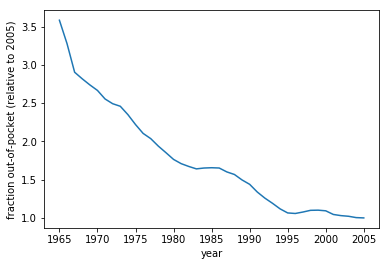

In [66]:
shares = shares[(shares.index>=1965) & (shares.index<=2005)]
plt.figure()
plt.plot(shares.index,shares['oopr'])
plt.xlabel('year')
plt.ylabel('fraction out-of-pocket (relative to 2005)')
plt.savefig('../figures/coinsurance.png')
plt.show()

The factor to apply to co-insurance rates is:

In [93]:
shares.loc[1965,'oopr']

3.582116660339439

In [250]:

oopr

1965    3.582117
1966    3.276414
1967    2.902786
1968    2.816985
1969    2.737514
1970    2.665315
1971    2.553555
1972    2.491758
1973    2.458459
1974    2.349319
1975    2.219663
1976    2.103897
1977    2.035768
1978    1.937766
1979    1.852264
1980    1.764204
1981    1.708826
1982    1.672223
1983    1.640624
1984    1.651688
1985    1.655544
1986    1.651897
1987    1.600970
1988    1.567336
1989    1.496042
1990    1.438941
1991    1.338494
1992    1.258618
1993    1.191196
1994    1.118322
1995    1.065073
1996    1.057979
1997    1.076778
1998    1.099102
1999    1.101245
2000    1.092842
2001    1.045078
2002    1.029966
2003    1.021437
2004    1.004074
2005    1.000000
Name: oopr, dtype: float64

In [260]:
oopr = shares['oopr']
toadd = pd.DataFrame(data=None,index=[x for x in range(2006,2061)])
oopr = oopr.append(toadd)
oopr = oopr.sort_index()
for x in range(2006,2061):
    oopr.loc[x] = oopr.loc[x-1]
oopr.to_csv('../params/input/oop.csv',sep=',',header=False,index=False)

## Real health care spending per capita calculations

In [94]:
med['cpi'] = cpi['value']

In [95]:
med['npercap'] = med['tot']/med['pop']
med['rpercap'] = med['npercap']/med['cpi'] * med.loc[2005,'cpi']

For MEPS calculations print out nominal per capita NHE for 1996 to 2008

In [96]:
med.loc[(med.index>=1996) & (med.index<=2008), 'npercap']

1996    3130.258303
1997    3266.978102
1998    3417.046931
1999    3602.609319
2000    3817.290780
2001    4107.445614
2002    4434.229965
2003    4748.579310
2004    5059.372014
2005    5370.477966
2006    5665.624161
2007    5958.471761
2008    6184.875000
Name: npercap, dtype: float64

In [97]:
b = med.loc[1965,'rpercap']
med['rpercap_rel'] = med['rpercap']/b
(med.loc[1965,'rpercap'],med.loc[2005,'rpercap'],med.loc[2005,'rpercap']/med.loc[1965,'rpercap'])

(1031.5678807421896, 5370.477966101695, 5.206131429991556)

Text(0,0.5,'real per capita health spending (relative 1965)')

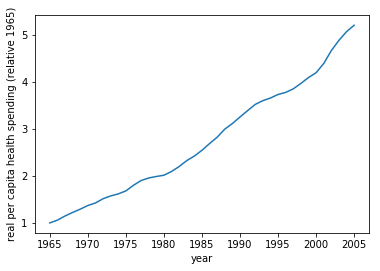

In [98]:
med = med[(med.index>=1965) & (med.index<=2005)]
plt.figure()
plt.plot(med.index,med['rpercap_rel'])
plt.xlabel('year')
plt.ylabel('real per capita health spending (relative 1965)')

In [99]:
med['rpercap_pct'] = med.loc[:,'rpercap'].pct_change()
mpct = med.loc[:,'rpercap_pct'].mean()

/Users/loulou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


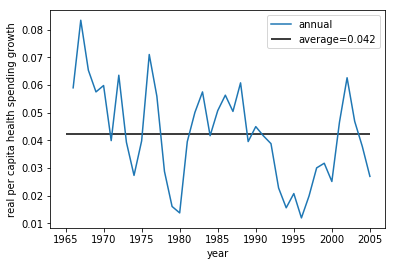

In [100]:
plt.figure()
plt.plot(med.index,med['rpercap_pct'],label='annual')
plt.hlines(mpct,xmin=1965,xmax=2005,label='average='+str(np.round(mpct,3)))
plt.xlabel('year')
plt.ylabel('real per capita health spending growth')
plt.legend()
plt.show()

Factor that needs to be applied to Health care spending for target

In [101]:
med.loc[1965,'rpercap']/med.loc[2005,'rpercap']

0.19208120529558392

# Life Expectancy

This exercice aims to investigate differences in mortality rates and life expectancy by cohort vs period and sources

Mortality rates for US males

In [102]:
lf = pd.read_csv(path+'/raw/other/mltper_1x1.txt',header=1,sep='\s+')
lf.head()

,Year,Age,mx,qx,ax,lx,dx,Lx,Tx,ex
0,1933,0,0.06818,0.06486,0.25,100000,6486,95139,5918927,59.19
1,1933,1,0.01004,0.00999,0.50,93514,934,93047,5823788,62.28
2,1933,2,0.00467,0.00466,0.50,92580,431,92364,5730741,61.90
3,1933,3,0.00333,0.00333,0.50,92148,307,91995,5638377,61.19
4,1933,4,0.00254,0.00253,0.50,91842,233,91725,5546382,60.39


In [103]:
lf['Age'] = np.where(lf['Age']=='110+','110',lf['Age'])
lf['Age'] = pd.to_numeric(lf['Age'],errors='ignore')
lf = lf.set_index(['Year','Age'])

In [104]:
yrs =[x for x in range(1965,2006)]
ex = [25+lf.loc[(x,25),'ex'] for x in yrs]


At age 25: expected age of death 

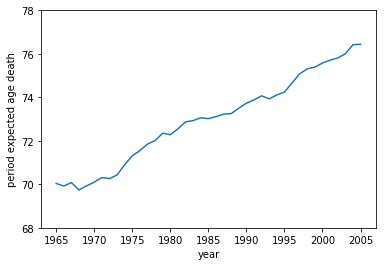

In [105]:
plt.figure()
plt.plot(yrs,ex)
plt.xlabel('year')
plt.ylim([68,78])
plt.ylabel('period expected age death')
plt.show()

Remaining life expectancy should be lower by a factor of 

In [106]:
fac = ex[0]/ex[-1:]
(ex[0],ex[-1:],fac[0])

(70.03999999999999, [76.44], 0.9162742019884876)

In [107]:
mx = [lf.loc[(1940+x,x),'mx'] for x in range(0,75)]
ages = [x for x in range(0,75)]

In [108]:
exb = [0+lf.loc[(x,0),'ex'] for x in yrs]
exb

[66.8,
 66.69,
 66.94,
 66.55,
 66.77,
 67.02,
 67.39,
 67.42,
 67.62,
 68.18,
 68.72,
 69.08,
 69.41,
 69.62,
 70.01,
 69.98,
 70.41,
 70.8,
 70.97,
 71.12,
 71.08,
 71.14,
 71.31,
 71.32,
 71.6,
 71.85,
 72.03,
 72.32,
 72.17,
 72.39,
 72.59,
 73.07,
 73.55,
 73.81,
 73.92,
 74.12,
 74.27,
 74.36,
 74.54,
 74.99,
 74.99]

We can check plausability of those against cohort death rates

In [109]:
clf = pd.read_csv(path+'/raw/other/cMx_1x1.txt',header=1,sep='\s+')
clf = clf[(clf['Year']>=1920) & (clf['Year']<=1950)]
clf['Age'] = np.where(clf['Age']=='110+','110',clf['Age'])
clf['Age'] = pd.to_numeric(clf['Age'],errors='ignore')
clf = clf.set_index(['Year','Age'])
clf = clf['Male']
clf = pd.to_numeric(clf,errors='coerce')

In [110]:
samp = clf.reset_index()

In [111]:
for b in range(1920,1951):
    samp['d'+str(b)] = np.where(samp['Year'] == b,1,0)

In [112]:
import statsmodels.api as sm
samp = samp.dropna()
samp = samp[(samp['Age']>=50)]
samp['logmx'] = np.log(samp['Male'])
names = ['Age']
for b in range(1920,1951):
    if b!=1940:
        names.append('d'+str(b))
X = samp[names]
X = sm.add_constant(X)
model = sm.OLS(samp['logmx'],X)
results = model.fit()
results.params

/Users/loulou/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const   -8.594583
Age      0.070029
d1920    0.445807
d1921    0.421885
d1922    0.388515
d1923    0.370063
d1924    0.352711
d1925    0.328471
d1926    0.298318
d1927    0.290600
d1928    0.256618
d1929    0.215964
d1930    0.213532
d1931    0.171901
d1932    0.184133
d1933    0.134142
d1934    0.127650
d1935    0.095074
d1936    0.071107
d1937    0.047428
d1938    0.036646
d1939    0.003633
d1941   -0.009577
d1942   -0.018452
d1943   -0.033398
d1944   -0.064036
d1945   -0.094742
d1946   -0.099137
d1947   -0.102441
d1948   -0.106321
d1949   -0.106456
d1950   -0.104217
dtype: float64

In [113]:
slope = results.params[1]
slope

0.07002942295832479

In [114]:
aa = [x for x in range(0,111)]
imputed = [clf[(1940,x)] for x in aa]
for i,a in enumerate(aa):
    if (a>74):
        imputed[i] = imputed[i-1]*(1.0+slope)

imputed = pd.DataFrame(data={'age':aa,'mx':imputed})
imputed = imputed.set_index('age')

In [115]:
period = lf.loc[2005,'mx']
period = period[(period.index>=50) & (period.index<=85)]
base = lf.loc[1965,'mx']
base = base[(base.index>=50) & (base.index<=85)]


Note: We have used the SSA tables in the paper. They are much more pessimistic. Give in cohort basis mortality rates with expected age of death of 75.3... So need updating production31.do to be consistent (https://www.ssa.gov/oact/NOTES/as120/LifeTables_Tbl_7_1940.html)


In [116]:
ssa = pd.read_stata(path+'/raw/other/mortality-ssa-cohort.dta')
ssa.head()
ssa = ssa.set_index('age')


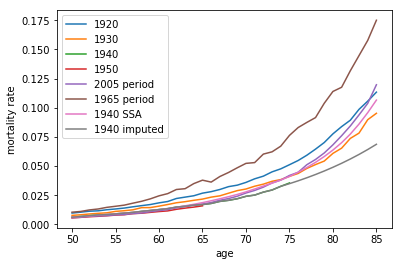

In [117]:
byrs = [1920,1930,1940,1950]
ages = [x for x in range(50,86)]
plt.figure()
for b in byrs:
    mx = clf[b]
    mx = mx[(mx.index>=50) & (mx.index<=85)]
    plt.plot(ages,mx,label=str(int(b)))
plt.plot(ages,period,label='2005 period')
plt.plot(ages,base,label='1965 period')
plt.plot(ages,ssa[(ssa.index>=50) & (ssa.index<=85)],label='1940 SSA')
im = imputed.loc[(imputed.index>=50) & (imputed.index<=85),'mx']
plt.plot(ages,im,label='1940 imputed')
plt.xlabel('age')
plt.ylabel('mortality rate')
plt.legend()
plt.show()

What is the life expectancy using the imputed table?

In [118]:
def getex(df,age,mx):
    df['sx'] = 1.0
    amin = np.min(df.index.values)
    amax = np.max(df.index.values)
    for a in range(amin,amax):
        if (a>amin):
            df.loc[a,'sx'] = df.loc[a-1,'sx']*(1.0-df.loc[a,mx])  
        else :
            df.loc[a,'sx'] = 1.0-df.loc[a,mx]
    return age + np.sum(df.loc[age:,'sx']/df.loc[age,'sx']) - 1

In [119]:
ex = []
labs = []

At 25, expected age of death is :

In [120]:
getex(imputed,25,'mx')

77.33793719055754

In [121]:
ex.append(getex(imputed,25,'mx'))
labs.append('Imputed 1940 cohort')

In [122]:
getex(ssa,25,'pmx')

75.22004723788274

In [123]:
ex.append(getex(ssa,25,'pmx'))
labs.append('SSA 1940 cohort')

For period life tables, here are the numbers


In [124]:
period = lf.loc[2005,'mx']
period = period.reset_index()
period = period.set_index('Age')
getex(period,25,'mx')

75.80084847023191

In [125]:
ex.append(getex(period,25,'mx'))
labs.append('ref 2005 period')


In [92]:
base = lf.loc[1965,'mx']
base = base.reset_index()
base = base.set_index('Age')
getex(base,25,'mx')

69.41821175805106

In [93]:
ex.append(getex(base,25,'mx'))
labs.append('base 1965 period')


In [94]:
table = pd.DataFrame(data={'labels':labs,'e25':ex})
table = table[['labels','e25']]
table['e25'] = table['e25'].round(2)
table

,labels,e25
0,Imputed 1940 cohort,77.34
1,SSA 1940 cohort,75.22
2,ref 2005 period,75.80
3,base 1965 period,69.42


In [95]:
imputed.columns = ['pmx','sx']
imputed.to_stata(path+'/data/mx_hmd_cohort.dta')


Bottom line is SSA takes pessimistic view for future. If we project 1940 HMD cohort mortality rates, we get almost 2 more years of LE. If keep SSA, LE based on cohort ver similar to period 2005. This means almost no gain in mortality rates at older ages for this cohort...

## Numbers for Stylized Model (check Simple.ipynb)

Remaining years of life:

In [127]:
(25+lf.loc[(1965,25),'ex'],25+lf.loc[(2005,25),'ex'])

(70.03999999999999, 76.44)

In [96]:
[ex[0]-25, ex[-1]-25]

[52.33793719055754, 44.41821175805106]

Health spending per capita:

In [97]:
[med.loc[1965,'rpercap'], med.loc[2005,'rpercap']]

[1031.5678807421896, 5370.477966101695]

Income per capita

In [98]:
[gdp.loc[1965,'A939RX0Q048SBEA'], gdp.loc[2005,'A939RX0Q048SBEA']]

[18251.225593305055, 42849.64042172998]

# Age Distribution 1965

Numbers from HMD (https://www.mortality.org/hmd/USA/STATS/Population.txt). Was asked by referee. Very similar.

In [99]:
pop = pd.read_csv(path+'/raw/other/Population.txt',header=1,sep='\s+')
pop = pop[pop['Year'].isin(['1965','2005'])]
pop['Age'] = np.where(pop['Age']=='110+','110',pop['Age'])
pop['Age'] = pop['Age'].astype('Int64')
pop = pop.set_index(['Year','Age'])
pop = pop['Male']
pop.columns = ['total']
pop = pop.unstack().transpose()
pop = pop[pop.index>=25]
pop['1965'] = pop['1965']/pop['1965'].sum()
pop['2005'] = pop['2005']/pop['2005'].sum()

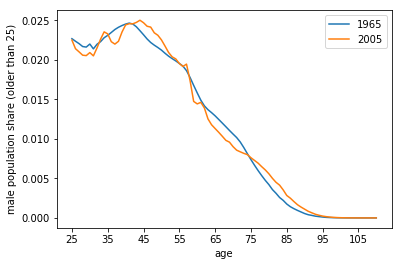

In [100]:
plt.figure()
plt.plot(pop.index,pop['1965'],label='1965')
plt.plot(pop.index,pop['2005'],label='2005')
plt.xlabel('age')
plt.xticks(np.arange(25, 110, step=10))
plt.ylabel('male population share (older than 25)')
plt.legend()
plt.show()
